## Data Science and Machine Learning Lab 2
## Assignment 1


In [13]:
from sklearn.datasets import fetch_openml

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

**Import data from MNIST Dataset**

In [172]:
# from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [173]:
X, y = mnist['data'], mnist['target']

In [174]:
X.shape

(70000, 784)

In [175]:
y.shape

(70000,)

**MNIST dataset Train-test Split**

In [176]:
# The MNIST dataset is actually already split into a training set (the first 60,000 images) 
# and a test set (the last 10,000 images)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Random Forest Classifier

In [177]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

/Users/shah.peace/anaconda3/envs/data-x/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [178]:
# Training error
y_train_pred = clf.predict(X_train)
print("Training Accuracy: " + str(accuracy_score(y_train,y_train_pred)))

Training Accuracy: 0.9992666666666666


In [179]:
# Generalization Error
y_test_pred = clf.predict(X_test)
print("Testing Accuracy: " + str(accuracy_score(y_test,y_test_pred)))

Testing Accuracy: 0.9487


### Testing accuracy is comparable to training accuracy. This shows the predictions are balanced.

### Performance Measures

Text(0.5, 103.73999999999997, 'Predicted Label')

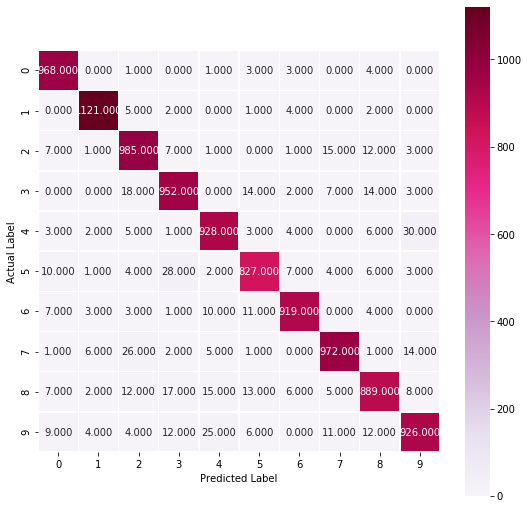

In [181]:
# Building Confusion Matrix
conf_mx = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(9,9))
sns.heatmap(conf_mx, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'PuRd')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## From the confusion matrix, it seems that the predictions are quite balanced.

# Multi-layered feedforward neural network with 1 hidden layer (MLFFNN)

In [160]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [162]:
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras. \
                            datasets.mnist.load_data()

# input information
print('Train input shape:',x_train.shape)
print('Test input shape:',x_test.shape)

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)


In [163]:
# Normalize the data, flatten inputs, and convert datatype
x_train = x_train.reshape(60000, 28*28). \
                    astype('float32') / 255 #784

x_test = x_test.reshape(10000, 28*28) \
                    .astype('float32') / 255

In [164]:
# Initialize model constructor
model = Sequential()

model.add(Dense(300, activation='relu', input_shape=(784,)))

# # Hidden Layer
# model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [165]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [166]:
# train the model
NO_EPOCHS = 10
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 118us/sample - loss: 0.2794 - acc: 0.9201 - val_loss: 0.1463 - val_acc: 0.9597
Epoch 2/10
48000/48000 [==============================] - 5s 102us/sample - loss: 0.1186 - acc: 0.9662 - val_loss: 0.1077 - val_acc: 0.9686
Epoch 3/10
48000/48000 [==============================] - 5s 99us/sample - loss: 0.0775 - acc: 0.9770 - val_loss: 0.1009 - val_acc: 0.9685
Epoch 4/10
48000/48000 [==============================] - 5s 112us/sample - loss: 0.0554 - acc: 0.9835 - val_loss: 0.0828 - val_acc: 0.9750
Epoch 5/10
48000/48000 [==============================] - 5s 100us/sample - loss: 0.0403 - acc: 0.9881 - val_loss: 0.0773 - val_acc: 0.9773
Epoch 6/10
48000/48000 [==============================] - 5s 107us/sample - loss: 0.0312 - acc: 0.9910 - val_loss: 0.0757 - val_acc: 0.9774
Epoch 7/10
48000/48000 [==============================] - 5s 101us/sample - loss: 0.0221 - acc: 0.9941 - val_lo

In [167]:
# Training error
model.evaluate(x_train,y_train,verbose=0)[1]

0.9931

In [168]:
# Generalization Error
model.evaluate(x_test,y_test,verbose=0)[1]

0.9795

### Testing accuracy is comparable to training accuracy. This shows the predictions are balanced.

### Performance Measures

In [169]:
y_test_pred = model.predict(x_test)

In [170]:
# confusion_matrix(y_test, y_test_pred)
y_test_cat = keras.utils.to_categorical(y_test)

Text(0.5, 103.73999999999997, 'Predicted Label')

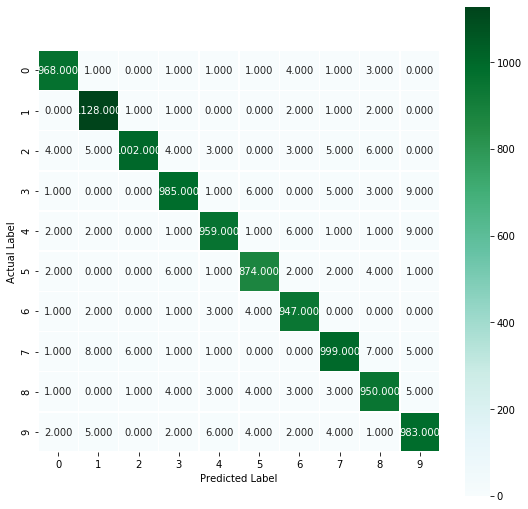

In [171]:
# Building Confusion Matrix
conf_mx_MLFFNN = confusion_matrix(y_test_cat.argmax(axis=1), y_test_pred.argmax(axis=1))
plt.figure(figsize=(9,9))
sns.heatmap(conf_mx_MLFFNN, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'BuGn')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## From the confusion matrix, it seems that the predictions are quite balanced.

# CNN

In [118]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [119]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [120]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

W1213 23:58:11.023877 4671935936 deprecation_wrapper.py:119] From /Users/shah.peace/anaconda3/envs/data-x/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1213 23:58:11.028067 4671935936 deprecation_wrapper.py:119] From /Users/shah.peace/anaconda3/envs/data-x/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1213 23:58:11.067151 4671935936 deprecation_wrapper.py:119] From /Users/shah.peace/anaconda3/envs/data-x/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1213 23:58:11.072590 4671935936 deprecation_wrapper.py:119] From /Users/shah.peace/anaconda3/envs/data-x/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Ple

In [121]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [122]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

W1213 23:58:51.429691 4671935936 deprecation_wrapper.py:119] From /Users/shah.peace/anaconda3/envs/data-x/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1213 23:58:51.441552 4671935936 deprecation_wrapper.py:119] From /Users/shah.peace/anaconda3/envs/data-x/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [123]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W1213 23:58:58.831534 4671935936 deprecation.py:323] From /Users/shah.peace/anaconda3/envs/data-x/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2796 - acc: 0.9138 - val_loss: 0.0554 - val_acc: 0.9823
Epoch 2/12
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0903 - acc: 0.9732 - val_loss: 0.0411 - val_acc: 0.9855
Epoch 3/12
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0692 - acc: 0.9781 - val_loss: 0.0443 - val_acc: 0.9858
Epoch 4/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0553 - acc: 0.9830 - val_loss: 0.0317 - val_acc: 0.9892
Epoch 5/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0491 - acc: 0.9854 - val_loss: 0.0278 - val_acc: 0.9911
Epoch 6/12
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0430 - acc: 0.9868 - val_loss: 0.0267 - val_acc: 0.9910
Epoch 7/12
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0375 - acc: 0.9885 - val_loss: 0.0310 - val_acc

In [129]:
# Training error
y_train_pred = model.predict(x_train)
model.evaluate(x_train,y_train,verbose=0)[1]

0.99805

In [130]:
# Generalization Error
y_test_pred = model.predict(x_test)
model.evaluate(x_test,y_test,verbose=0)[1]

0.9919

### Testing accuracy is comparable to training accuracy. This shows the predictions are balanced.

### Performance Measures

In [127]:
# confusion_matrix(y_test, y_test_pred)
# y_test_cat = keras.utils.to_categorical(y_test)

In [133]:
y_test.shape

(10000, 10)

In [134]:
y_test_pred.shape

(10000, 10)

Text(0.5, 103.73999999999997, 'Predicted Label')

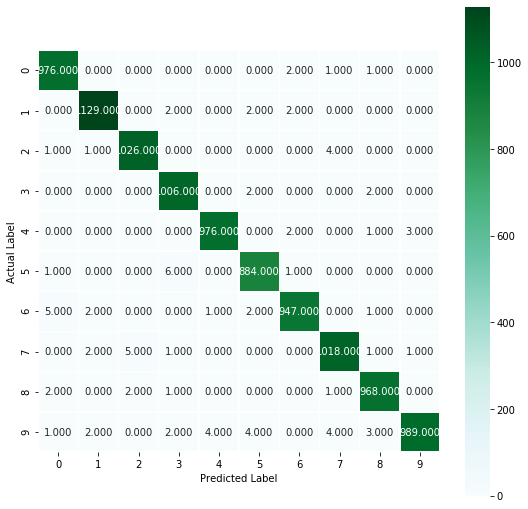

In [156]:
# Building Confusion Matrix
conf_mx_CNN = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
plt.figure(figsize=(9,9))
sns.heatmap(conf_mx_CNN, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'BuGn')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## From the confusion matrix, it seems that the predictions are quite balanced.

# “digit cloud” embedding visualization

In [140]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [143]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


In [144]:
# convert the matrix and vector to a Pandas DataFrame

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 786)


In [145]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

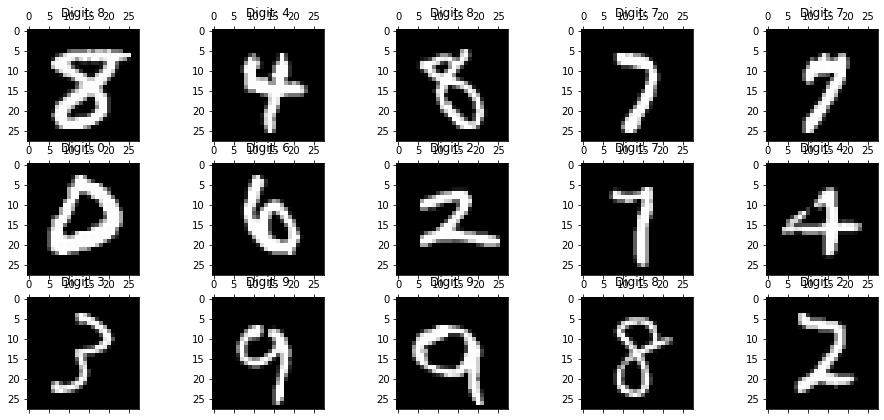

In [146]:
# checking how these numbers actually look like
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### dimensionality reduction using PCA

In [147]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


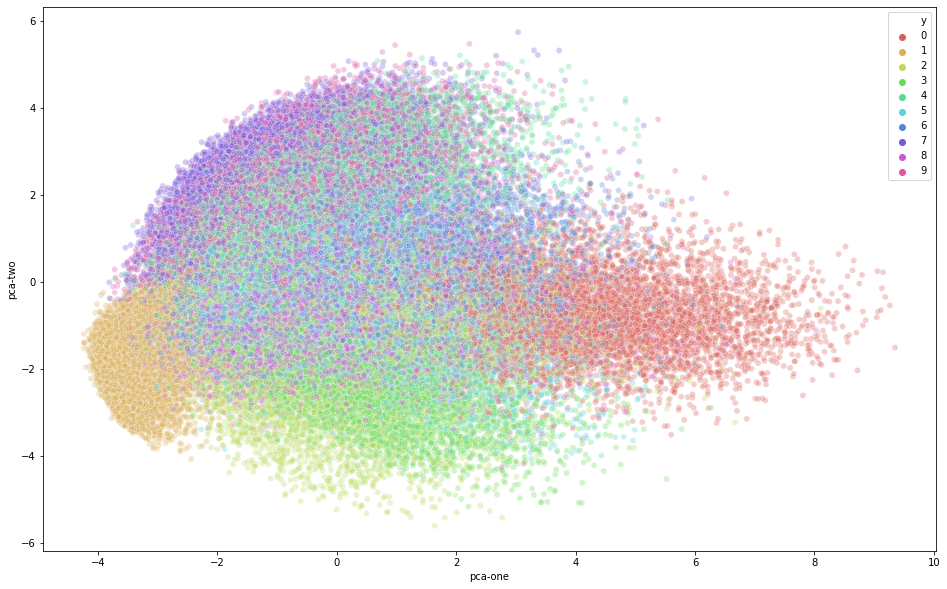

In [148]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)